In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.datasets import load_iris, make_blobs, make_moons
from sklearn.metrics import (
    adjusted_rand_score, completeness_score, homogeneity_score, silhouette_score, silhouette_samples
)

In [2]:
# load iris dataset to apply clustering algorithms.
# (iris dataset is originally designed for classification but we only use independent variables for this practice)

In [3]:
iris_dataset = load_iris()

In [4]:
x = iris_dataset["data"]

print("Type of x:", type(x))
print("Data type of x:", x.dtype)
print("Shape of x:", x.shape)

Type of x: <class 'numpy.ndarray'>
Data type of x: float64
Shape of x: (150, 4)


In [5]:
feature_names = iris_dataset["feature_names"]
print("Feature names")
print(feature_names)

Feature names
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
# Hierarchical clustering in scikit-learn library.

In [9]:
ward_model = AgglomerativeClustering(
    n_clusters=2, 
    metric="euclidean",  # {"euclidean", "l1", "l2", "manhattan", "cosine", "precomputed"}
    linkage="ward"  # {"ward", "complete", "average", "single"}
)
ward_model.fit(x)

AgglomerativeClustering()

In [ ]:
# print clustering results

In [10]:
print("Shape:", ward_model.labels_.shape)

Shape: (150,)


In [11]:
print(ward_model.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [14]:
# draw scatter plot for clustering results (use only first two variables for 2-Dimensional plot)

In [13]:
ward_labels = ward_model.labels_
unique_labels = np.unique(ward_labels)
print("Cluster labels:", unique_labels)

Cluster labels: [0 1]


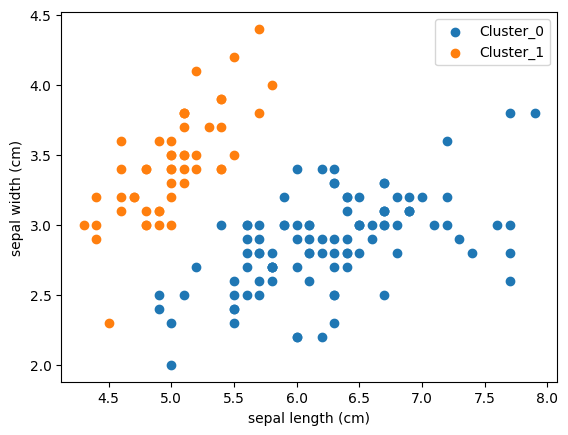

In [15]:
plt.figure()

indicator_0 = (ward_labels == 0)
x_0 = x[indicator_0, :]

plt.scatter(x_0[:, 0], x_0[:, 1], label="Cluster_0")

indicator_1 = (ward_labels == 1)
x_1 = x[indicator_1, :]

plt.scatter(x_1[:, 0], x_1[:, 1], label="Cluster_1")

plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.legend()
plt.show()

In [16]:
# how to interpret two clusters -> centroids.

In [22]:
centroids = {
    "Cluster 0": np.mean(x_0, axis=0), 
    "Cluster 1": np.mean(x_1, axis=0)
}

print(pd.DataFrame(centroids, index=feature_names))

                   Cluster 0  Cluster 1
sepal length (cm)      6.262      5.006
sepal width (cm)       2.872      3.428
petal length (cm)      4.906      1.462
petal width (cm)       1.676      0.246


In [23]:
# Hierarchical clustering using scipy library

In [27]:
Z = hierarchy.linkage(
    x, 
    method="ward",  # {"ward", "centroid", "complete", "average", "single"}
    metric="euclidean"  # {"euclidean", "hamming", "jaccard", "matching", "mahalanobis", ...}
    # -> see the documentation of pdist function in scipy
)

In [28]:
print(pd.DataFrame(Z))

         0      1          2      3
0    101.0  142.0   0.000000    2.0
1      7.0   39.0   0.100000    2.0
2      0.0   17.0   0.100000    2.0
3      9.0   34.0   0.100000    2.0
4    128.0  132.0   0.100000    2.0
..     ...    ...        ...    ...
144  282.0  290.0   3.828053   50.0
145  287.0  288.0   4.847709   36.0
146  292.0  293.0   6.399407   64.0
147  295.0  296.0  12.300396  100.0
148  294.0  297.0  32.447607  150.0

[149 rows x 4 columns]


In [29]:
# the first and second column represent the index of original data sample or grouped cluster.
# the third column is the distance between them.
# the fourth column is the number of original data samples (cluster size) after the integration.

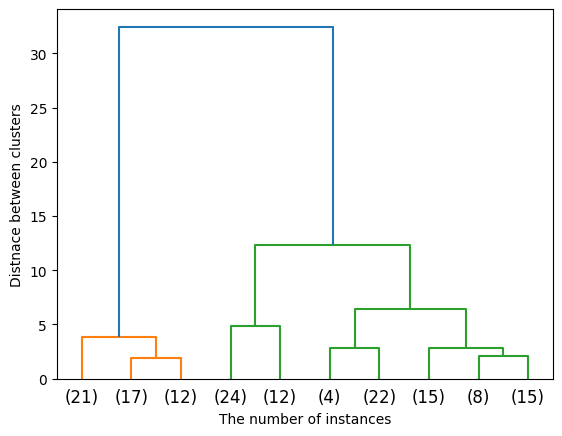

In [33]:
fig = plt.figure()
dend = hierarchy.dendrogram(
    Z, 
    color_threshold=15, 
    truncate_mode="lastp", 
    p=10
)
plt.xlabel("The number of instances")
plt.ylabel("Distnace between clusters")
plt.show()

In [34]:
# repeat the same process for n_clusters=3

In [37]:
ward3_model = AgglomerativeClustering(n_clusters=3, metric="euclidean", linkage="ward")
ward3_model.fit(x)

AgglomerativeClustering(n_clusters=3)

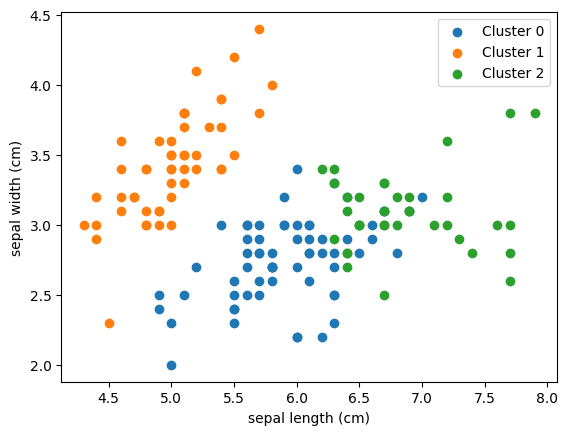

In [40]:
ward3_labels = ward3_model.labels_

plt.figure()
for label_c in np.unique(ward3_labels):
    label_indicator = (ward3_labels == label_c)
    x_c = x[label_indicator, :]

    plt.scatter(x_c[:, 0], x_c[:, 1], label=f"Cluster {label_c}")

plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.legend()
plt.show()

In [41]:
centroids_ward3 = {
    f"Cluster {label}": np.mean(x[ward3_labels == label, :], axis=0)
    for label in np.unique(ward3_labels)
}

pd.DataFrame(centroids_ward3, index=feature_names).T

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
Cluster 0,5.920313,2.751563,4.420313,1.434375
Cluster 1,5.006000,3.428000,1.462000,0.246000
Cluster 2,6.869444,3.086111,5.769444,2.105556


In [42]:
# K-means clustering

In [43]:
# here I prepared an example dataset.
x = np.c_[
    [4, 20, 3, 19, 17, 8, 19, 18, 12.5], 
    [15, 13, 13, 4, 17, 11, 12, 6, 9]
]

feature_names = ["experience", "violation"]

pd.DataFrame(x, columns=feature_names)

,experience,violation
0,4.0,15.0
1,20.0,13.0
2,3.0,13.0
3,19.0,4.0
4,17.0,17.0
5,8.0,11.0
6,19.0,12.0
7,18.0,6.0
8,12.5,9.0


In [44]:
# apply k-means clustering to this example dataset.

In [45]:
n_cluster = 3

kmeans = KMeans(
    n_clusters=n_cluster, 
    init="random", 
    random_state=1234
)
kmeans.fit(x)

KMeans(init='random', n_clusters=3, random_state=1234)

In [46]:
print(kmeans.labels_)

[1 2 1 0 2 1 2 0 0]


In [48]:
# plot clustering result.
kmeans_labels1 = kmeans.labels_
unq_labels1 = np.unique(kmeans_labels1)

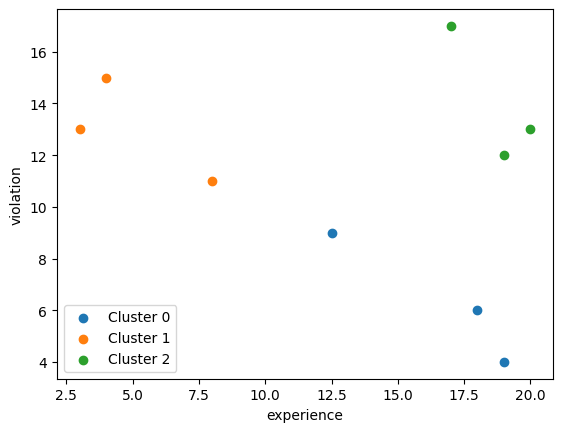

In [49]:
plt.figure()
for c in unq_labels1:
    c_ind = (kmeans_labels1 == c)
    x_c = x[c_ind, :]
    plt.scatter(x_c[:, 0], x_c[:, 1], label=f"Cluster {c}")

plt.xlabel("experience")
plt.ylabel("violation")
plt.legend()
plt.show()

In [50]:
# compute and display centroids for interpretation

In [52]:
centroids = {
    f"Cluster {label}": np.mean(x[kmeans_labels1 == label, :], axis=0)
    for label in unq_labels1
}

pd.DataFrame(centroids, index=feature_names).T

,experience,violation
Cluster 0,16.500000,6.333333
Cluster 1,5.000000,13.000000
Cluster 2,18.666667,14.000000


In [53]:
# Here I prepared an example of another result

In [54]:
init_centroids = x[:3, :]
kmeans = KMeans(n_clusters=3, init=init_centroids)
kmeans.fit(x)

KMeans(init=array([[ 4., 15.],
       [20., 13.],
       [ 3., 13.]]),
       n_clusters=3)

In [55]:
kmeans_labels2 = kmeans.labels_
unq_labels2 = np.unique(kmeans_labels2)

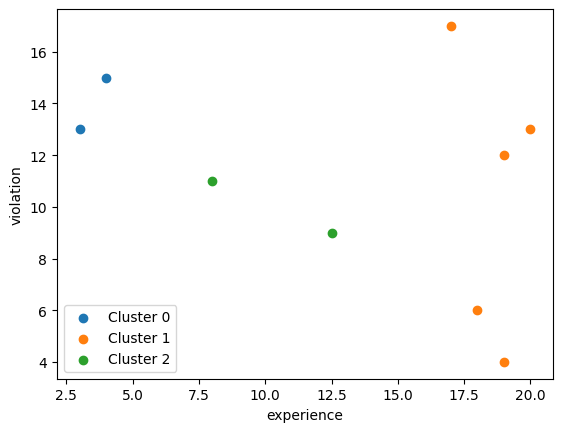

In [56]:
plt.figure()

for c in unq_labels2:
    c_ind = (kmeans_labels2 == c)
    x_c = x[c_ind, :]
    plt.scatter(x_c[:, 0], x_c[:, 1], label=f"Cluster {c}")

plt.xlabel("experience")
plt.ylabel("violation")
plt.legend()
plt.show()

In [57]:
# apply k-means to iris dataset.

In [58]:
x = iris_dataset["data"]
print(x.shape)

(150, 4)


In [61]:
iris_feature_names = iris_dataset["feature_names"]

In [60]:
kmeans_iris = KMeans(n_clusters=3)
kmeans_iris.fit(x)

KMeans(n_clusters=3)

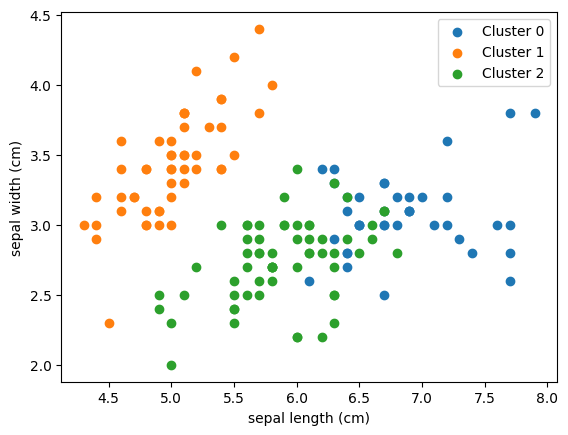

In [62]:
plt.figure()
for c in np.unique(kmeans_iris.labels_):
    c_ind = (kmeans_iris.labels_ == c)
    x_c = x[c_ind, :]
    plt.scatter(x_c[:, 0], x_c[:, 1], label=f"Cluster {c}")

plt.xlabel(iris_feature_names[0])
plt.ylabel(iris_feature_names[1])
plt.legend()
plt.show()

In [50]:
# how to measure the quality of clustering results

In [64]:
n_c = 3
kmeans_iris = KMeans(n_clusters=n_c)
aggl_iris = AgglomerativeClustering(n_clusters=n_c, linkage="average")

In [66]:
kmeans_iris.fit(x)
aggl_iris.fit(x)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [71]:
# suppose we know the true group of data samples for evaluation.

In [72]:
y = iris_dataset["target"]

In [73]:
homogeneity_score(y, kmeans_iris.labels_)

0.7514854021988338

In [74]:
homogeneity_score(y, aggl_iris.labels_)

0.7959816227812412

In [75]:
completeness_score(y, kmeans_iris.labels_)

0.7649861514489815

In [76]:
completeness_score(y, aggl_iris.labels_)

0.8156456882407057

In [77]:
adjusted_rand_score(y, kmeans_iris.labels_)

0.7302382722834697

In [78]:
adjusted_rand_score(y, aggl_iris.labels_)

0.7591987071071522

In [79]:
silhouette_score(x, kmeans_iris.labels_)

0.5528190123564095

In [80]:
silhouette_score(x, aggl_iris.labels_)

0.554160858028285

In [81]:
sil_scores = []
for n_c in range(2, 11):
    kmeans_iris = KMeans(n_clusters=n_c)
    kmeans_iris.fit(x)

    sil_scores.append(silhouette_score(x, kmeans_iris.labels_))

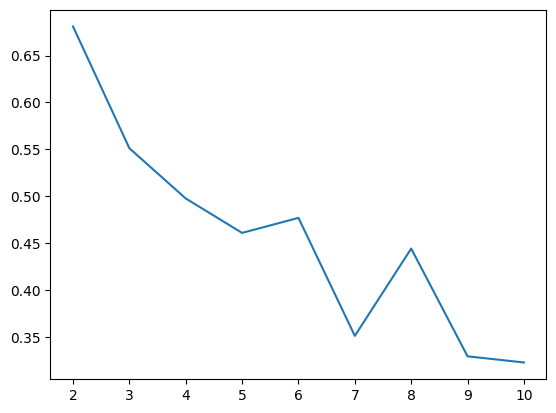

In [82]:
plt.figure()
plt.plot(range(2, 11), sil_scores)
plt.show()

In [83]:
# silhouette values for individual samples

In [87]:
sil_vals = silhouette_samples(x, kmeans_iris.labels_)

In [88]:
len(sil_vals)

150